In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("annawang021/jan24flights-cleaned")

print("Path to dataset files:", path)

100%|██████████| 9.15M/9.15M [00:00<00:00, 78.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/annawang021/jan24flights-cleaned/versions/3


In [3]:
df = pd.read_csv(path + "/cleaned_data.csv")
df.head()

,FL_DATE,MKT_UNIQUE_CARRIER,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY_NEW,DISTANCE
0,1/1/2024 12:00:00 AM,AA,"New York, NY",NY,"Los Angeles, CA",CA,900,852.0,-8.0,1124.0,0.0,2475.0
1,1/1/2024 12:00:00 AM,AA,"Los Angeles, CA",CA,"New York, NY",NY,1235,1232.0,-3.0,2107.0,8.0,2475.0
2,1/1/2024 12:00:00 AM,AA,"Boston, MA",MA,"Los Angeles, CA",CA,1800,1754.0,-6.0,2041.0,0.0,2611.0
3,1/1/2024 12:00:00 AM,AA,"Los Angeles, CA",CA,"Boston, MA",MA,750,742.0,-8.0,1638.0,19.0,2611.0
4,1/1/2024 12:00:00 AM,AA,"Phoenix, AZ",AZ,"Portland, OR",OR,1502,1458.0,-4.0,1654.0,0.0,1009.0


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [5]:
X = df.drop(['FL_DATE','ARR_DELAY_NEW'], axis=1)
y = df['ARR_DELAY_NEW']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

In [7]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [9]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [10]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'DISTANCE'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['MKT_UNIQUE_CARRIER', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'DEST_CITY_NAME', 'DEST_STATE_ABR'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [16]:
y_pred = model.predict(X_test)

In [13]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 155.0500973890267
R2 Score: 0.9619098452549067


In [27]:
threshold = 15

from sklearn.metrics import accuracy_score, classification_report
y_class = np.where(y_test <= threshold, 0, 1)

y_pred_class = np.where(y_pred <= threshold, 0, 1)

print(classification_report(y_class, y_pred_class))


              precision    recall  f1-score   support

           0       0.94      0.92      0.93     85645
           1       0.76      0.82      0.79     26098

    accuracy                           0.90    111743
   macro avg       0.85      0.87      0.86    111743
weighted avg       0.90      0.90      0.90    111743



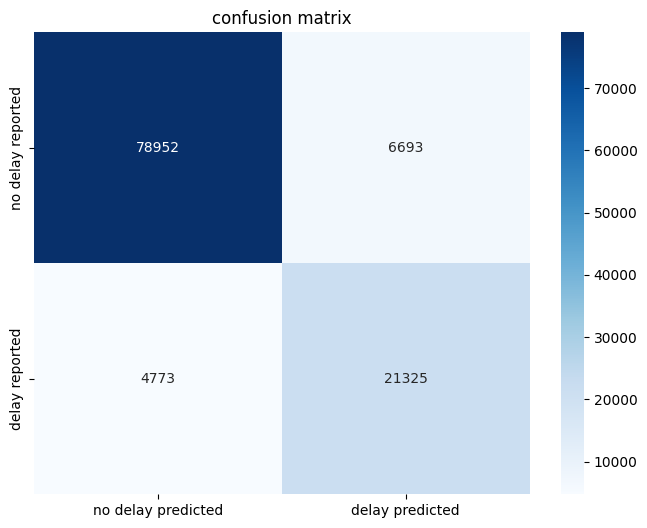

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_class = np.where(y_test <= threshold, 0, 1)
y_pred_class = np.where(y_pred <= threshold, 0, 1)

cm = confusion_matrix(y_class, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['no delay predicted', 'delay predicted'],
            yticklabels=['no delay reported', 'delay reported'])
plt.title('confusion matrix')
plt.show()
